<a href="https://colab.research.google.com/github/dedemasutti/data-science/blob/main/Ciencia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Carregando os dados

In [2]:
dados = pd.read_csv('/content/dados_vendas.csv')

###Análise exploratória dos dados

In [3]:
dados.head()

,Valor,Produto,Unidades Vendidas,Código,Total de Vendas,Data
0,229.47,Televisão,8,COD001,688.41,2023-01-01
1,472.56,Notebook,7,COD002,1890.24,2023-01-02
2,481.71,Tablet,10,COD003,2408.55,2023-01-03
3,357.61,Monitor,4,COD004,1788.05,2023-01-04
4,282.01,Notebook,7,COD005,1128.04,2023-01-05


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Valor              30 non-null     float64
 1   Produto            30 non-null     object 
 2   Unidades Vendidas  30 non-null     int64  
 3   Código             30 non-null     object 
 4   Total de Vendas    30 non-null     float64
 5   Data               30 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ KB


In [5]:
dados.describe()

,Valor,Unidades Vendidas,Total de Vendas
count,30.000000,30.000000,30.000000
mean,264.273000,6.333333,863.846000
std,135.894146,2.758477,641.181562
min,53.170000,1.000000,70.130000
25%,165.907500,4.000000,360.055000
50%,250.965000,6.000000,653.490000
75%,358.292500,9.000000,1277.512500
max,485.940000,10.000000,2408.550000


In [6]:
dados['Produto'].unique()

array(['Televisão', 'Notebook', 'Tablet', 'Monitor', 'Smartphone',
       'Carregador Portátil', 'Drone', 'Relógio Inteligente',
       'Repetidor de Sinal Wi-Fi', 'Console de Video Game',
       'Fones de Ouvido', 'Smartwatch', 'Câmera de Segurança',
       'Cafeteira', 'Teclado', 'Panela Elétrica', 'Projetor', 'Headset',
       'Caixa de Som'], dtype=object)

In [7]:
dados['Produto'].value_counts()


Cafeteira                   3
Televisão                   2
Tablet                      2
Monitor                     2
Carregador Portátil         2
Drone                       2
Relógio Inteligente         2
Notebook                    2
Fones de Ouvido             2
Smartwatch                  2
Teclado                     1
Headset                     1
Projetor                    1
Panela Elétrica             1
Console de Video Game       1
Câmera de Segurança         1
Repetidor de Sinal Wi-Fi    1
Smartphone                  1
Caixa de Som                1
Name: Produto, dtype: int64

In [8]:
# Verificar valores ausentes em cada coluna
print(dados.isnull().sum())

# Preencher valores ausentes com um valor específico
dados.fillna(0, inplace=True)


Valor                0
Produto              0
Unidades Vendidas    0
Código               0
Total de Vendas      0
Data                 0
dtype: int64


In [15]:
# Filtrar o DataFrame com base em condições
dados_filtrados = dados[dados['Unidades Vendidas'] >= 7]

# Selecionar apenas algumas colunas específicas
colunas_interessantes = ['Produto', 'Unidades Vendidas', 'Total de Vendas']
dados_interessantes = dados[colunas_interessantes]
print(dados_filtrados)

     Valor                   Produto  Unidades Vendidas  Código  \
0   229.47                 Televisão                  8  COD001   
1   472.56                  Notebook                  7  COD002   
2   481.71                    Tablet                 10  COD003   
4   282.01                  Notebook                  7  COD005   
5    70.13                Smartphone                 10  COD006   
8   418.27                     Drone                  9  COD009   
9   206.19       Relógio Inteligente                  8  COD010   
12  155.99  Repetidor de Sinal Wi-Fi                  8  COD013   
13  195.66     Console de Video Game                  9  COD014   
17  230.08                Smartwatch                 10  COD018   
22  235.35                   Teclado                 10  COD023   
25  285.53                 Cafeteira                 10  COD026   
26  347.06                   Headset                  9  COD027   
29  485.94                 Cafeteira                  9  COD03

<ipython-input-17-a22d4e185f38>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dados.corr()


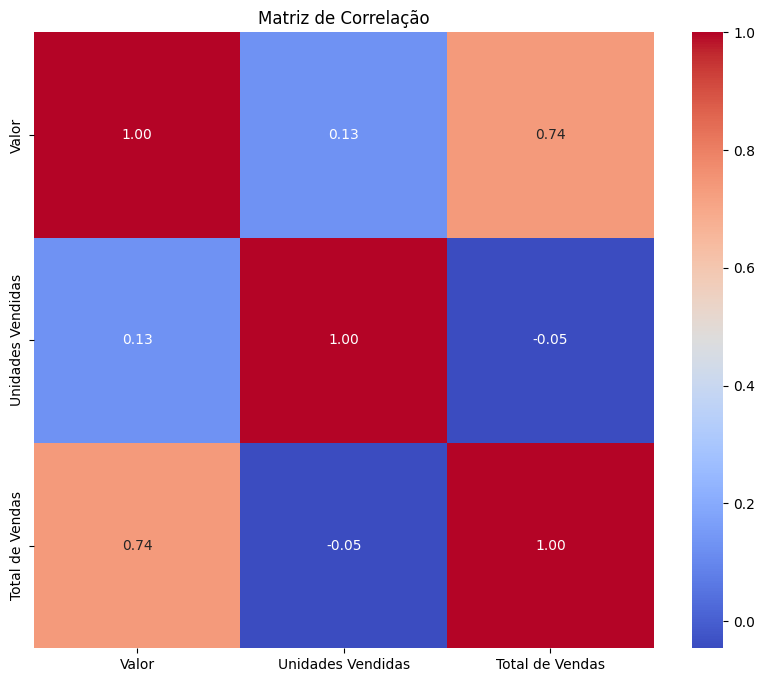

In [17]:
# Calcular a matriz de correlação entre as colunas numéricas
correlation_matrix = dados.corr()

# Plotar um mapa de calor (heatmap) da matriz de correlação
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


### Gráficos

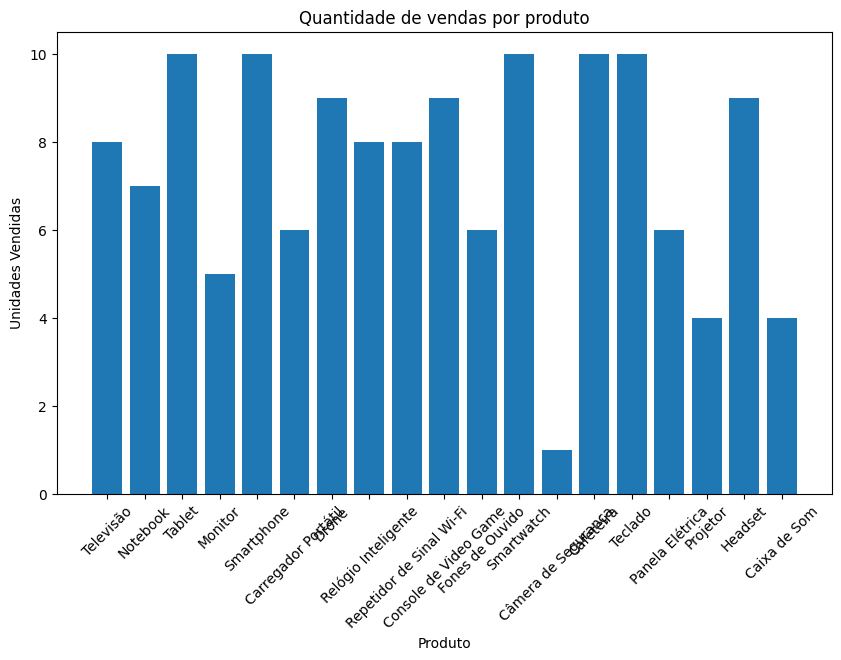

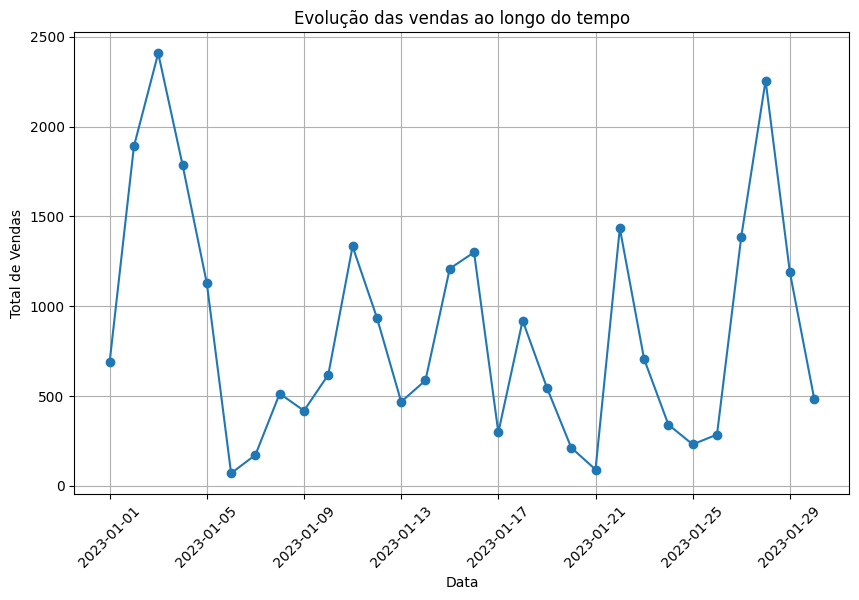

In [33]:
# Gráfico de barras para contar a quantidade de vendas por produto
plt.figure(figsize=(10, 6))
plt.bar(dados['Produto'], dados['Unidades Vendidas'])
plt.xlabel('Produto')
plt.ylabel('Unidades Vendidas')
plt.title('Quantidade de vendas por produto')
plt.xticks(rotation=45)
plt.show()

# Gráfico de linha para visualizar a evolução das vendas ao longo do tempo
dados['Data'] = pd.to_datetime(dados['Data'])  # Converter a coluna 'Data' para o formato datetime
dados = dados.sort_values(by='Data')  # Ordenar o DataFrame pela coluna 'Data'
plt.figure(figsize=(10, 6))
plt.plot(dados['Data'], dados['Total de Vendas'], marker='o')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.title('Evolução das vendas ao longo do tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### MACHINE LEARNING(REGRESSÃO LINEAR)

#### Imports

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Pré-processamento dos dados

In [20]:
# Definir as variáveis independentes (Unidades Vendidas) e a variável dependente (Total de Vendas)
X = dados['Unidades Vendidas'].values.reshape(-1, 1)
y = dados['Total de Vendas'].values

# Dividir o dataset em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Dividindo os dados em treino e dados de teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Padronizando os dados com standard Scaler



In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Treinando o modelo

In [21]:
# Inicializar e treinar o modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

### Avaliando o modelo

In [22]:
# Fazer previsões com o conjunto de teste
y_pred = regression_model.predict(X_test)

# Calcular o erro quadrático médio (MSE) e o coeficiente de determinação (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro quadrático médio (MSE): {mse:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.2f}")



Erro quadrático médio (MSE): 481943.26
Coeficiente de determinação (R²): -0.12


### Visualização do resultado

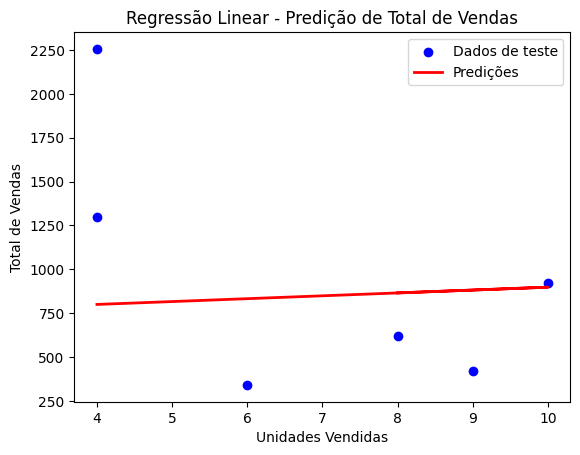

In [23]:
# Plotar os pontos do conjunto de teste e as previsões do modelo
plt.scatter(X_test, y_test, color='blue', label='Dados de teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predições')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Total de Vendas')
plt.legend()
plt.title('Regressão Linear - Predição de Total de Vendas')
plt.show()


### Represenção gráfica

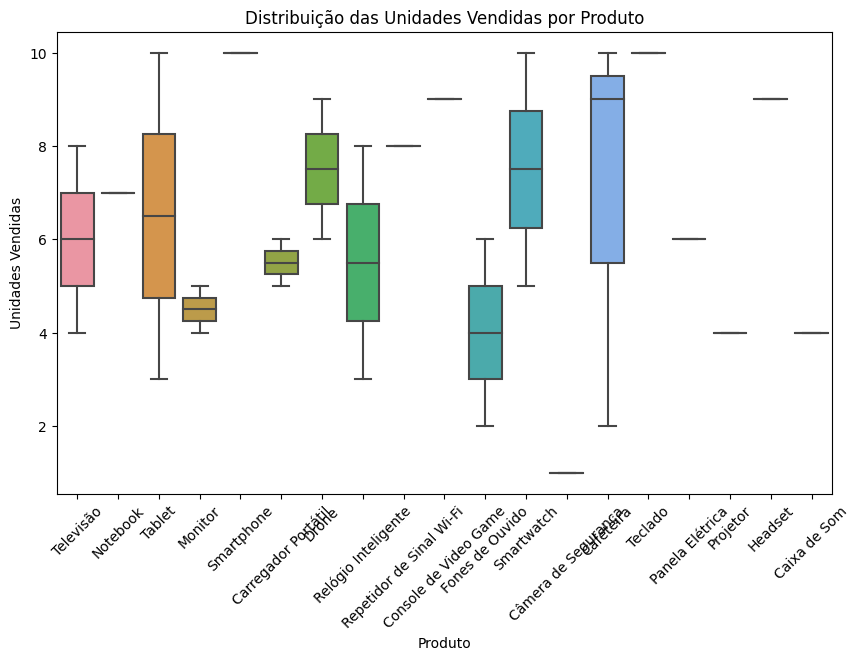

In [24]:
# Box plot para visualizar a distribuição das Unidades Vendidas por Produto
plt.figure(figsize=(10, 6))
sns.boxplot(x='Produto', y='Unidades Vendidas', data=dados)
plt.xlabel('Produto')
plt.ylabel('Unidades Vendidas')
plt.title('Distribuição das Unidades Vendidas por Produto')
plt.xticks(rotation=45)
plt.show()
